In [1]:
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session"""

'\n\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session'

# Introduction

## Problem Description

"Thyroid cancer currently ranks as the 13th most common cancer diagnosis overall and the 6th most common among women."
Cancer Epidemiol Biomarkers Prev. 2022 Jul 1;31(7):1284–1297. doi: 10.1158/1055-9965.EPI-21-1440


Although prognosis is considered to be good and the 5-year relative survival is 98.6% overall, 99.9% for localized, 98.3% for regional, and 54.9% for distant metastatic disease (Bethesda (MD): National Cancer Institute; 2021. Apr 15. Available from: http://seer.cancer.gov/csr/1975_2018), recurrence in this pathology is reported in 15% of the patients, (Cancers (Basel). 2023 May 10;15(10):2692. doi: 10.3390/cancers15102692).

It is important to determine which factors are associated with this outcome, so that is the main purpose of this work.

# Dataset Description

Searching for datasets on Kaggle there are various dedicated to thyroid cancer. “Differentiated-tyroid-cancer-recurrence” has the binary outcome we need, and also adequate follow up of the patients on a very complete dataset.

“This data set contains 13 clinicopathologic features and the rate of recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.”
https://www.kaggle.com/datasets/joebeachcapital/differentiated-thyroid-cancer-recurrence

# Analysis

This problem is going to be treated as a binary class classifier for predicting if the cancer is going to recur or not.
For completing the task, we need to:
 1. Inspect data
 2. Transform data for supervised learning
 3. Construct model (Logarithmic Regression and Decision tree)


# EDA
## 1.	Step one: Loading data

In [2]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/kaggle/input/differentiated-thyroid-cancer-recurrence/Thyroid_Diff.csv') 
df.shape

(383, 17)

## 2. Step Two: EDA, Data cleaning and transforming.

In [4]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [6]:
print(df['Age'].describe())
print("-------------Gender-----------------")
for i, col in enumerate(df.columns, start=1):
    print(f"{i}. {col}")
    print(df[col].unique())
    print("-------------")


count    383.000000
mean      40.866841
std       15.134494
min       15.000000
25%       29.000000
50%       37.000000
75%       51.000000
max       82.000000
Name: Age, dtype: float64
-------------Gender-----------------
1. Age
[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
-------------
2. Gender
['F' 'M']
-------------
3. Smoking
['No' 'Yes']
-------------
4. Hx Smoking
['No' 'Yes']
-------------
5. Hx Radiothreapy
['No' 'Yes']
-------------
6. Thyroid Function
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
-------------
7. Physical Examination
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
-------------
8. Adenopathy
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
-------------
9. 

### Initial transformation
So, as we see database is treated as a matrix with 383 patients and 16 features.
Feature 17 (Recurred) is out outcome.

On the manual inspection the only numerical variable is Age, while the rest of the variables can be further classified as either binary or categorical. This will help with better visualization of the relationships between variables and also prepares the data for constructing models later on.

In [7]:
# Transorming binary variables to 0 or 1 and others from object to type 'category'

#  0   Age                   383 non-null    int64 ok
# 1   Gender                383 non-null    object
df['Gender'] = df['Gender'].map({'M':0, 'F':1})
# 2   Smoking               383 non-null    object
df['Smoking'] = df['Smoking'].map({'No':0, 'Yes':1})
#3   Hx Smoking            383 non-null    object
df['Hx Smoking'] = df['Hx Smoking'].map({'No':0, 'Yes':1})
# 4   Hx Radiothreapy       383 non-null    object
df['Hx Radiothreapy'] = df['Hx Radiothreapy'].map({'No':0, 'Yes':1})
#5   Thyroid Function      383 non-null    object
df['Thyroid Function'] = df['Thyroid Function'].astype('category')
#6   Physical Examination  383 non-null    object
df['Physical Examination'] = df['Physical Examination'].astype('category')
# 7   Adenopathy            383 non-null    object
df['Adenopathy'] = df['Adenopathy'].astype('category')
# 8   Pathology             383 non-null    object
df['Pathology'] = df['Pathology'].astype('category')
# 9   Focality              383 non-null    object
df['Focality'] = df['Focality'].map({'Uni-Focal':0, 'Multi-Focal':1})
# 10  Risk                  383 non-null    object
df['Risk'] = df['Risk'].astype('category')
# 11  T                     383 non-null    object
df['T'] = df['T'].astype('category')
# 12  N                     383 non-null    object
df['N'] = df['N'].astype('category')
# 13  M                     383 non-null    object
df['M'] = df['M'].map({'M0':0, 'M1':1})
# 14  Stage                 383 non-null    object
df['Stage'] = df['Stage'].astype('category')
# 15  Response              383 non-null    object
df['Response'] = df['Response'].astype('category')
# 16  Recurred              383 non-null    object
df['Recurred'] = df['Recurred'].map({'No':0, 'Yes':1})

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    int64   
 2   Smoking               383 non-null    int64   
 3   Hx Smoking            383 non-null    int64   
 4   Hx Radiothreapy       383 non-null    int64   
 5   Thyroid Function      383 non-null    category
 6   Physical Examination  383 non-null    category
 7   Adenopathy            383 non-null    category
 8   Pathology             383 non-null    category
 9   Focality              383 non-null    int64   
 10  Risk                  383 non-null    category
 11  T                     383 non-null    category
 12  N                     383 non-null    category
 13  M                     383 non-null    int64   
 14  Stage                 383 non-null    category
 15  Respon

### Visualization of outcome distribution

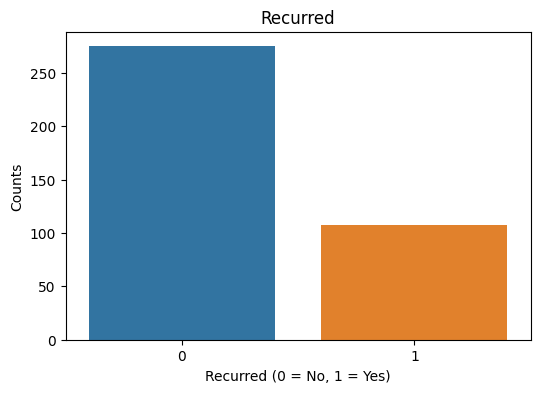

In [9]:
# Outcome distribution (y)

plt.figure(figsize=(6, 4))
sns.countplot(x='Recurred', data=df)
plt.title('Recurred')
plt.xlabel('Recurred (0 = No, 1 = Yes)')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


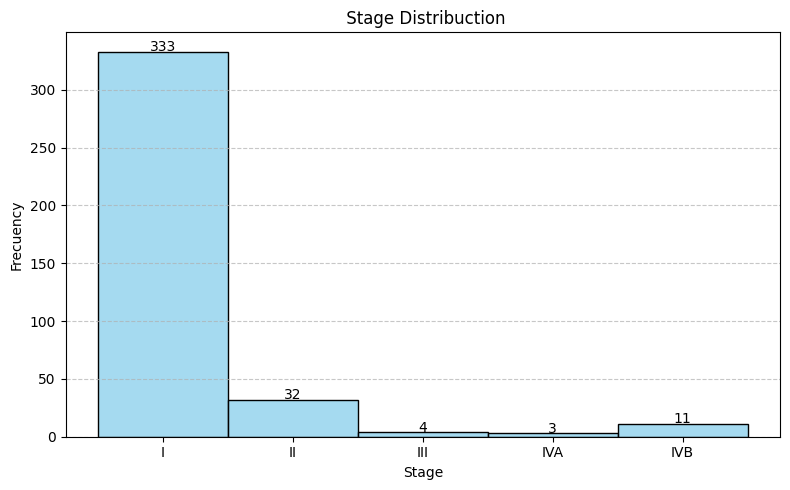

In [10]:
#
# This code can be used for plotting any variable alone
# Stage was plotted because in most papers it was associated with the outcome
#

stage_data = df['Stage']

plt.figure(figsize=(8, 5))
ax = sns.histplot(stage_data, bins=sorted(stage_data.unique()), discrete=True, color='skyblue')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center')

# Estética
plt.title(' Stage Distribuction')
plt.xlabel('Stage')
plt.ylabel('Frecuency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation map

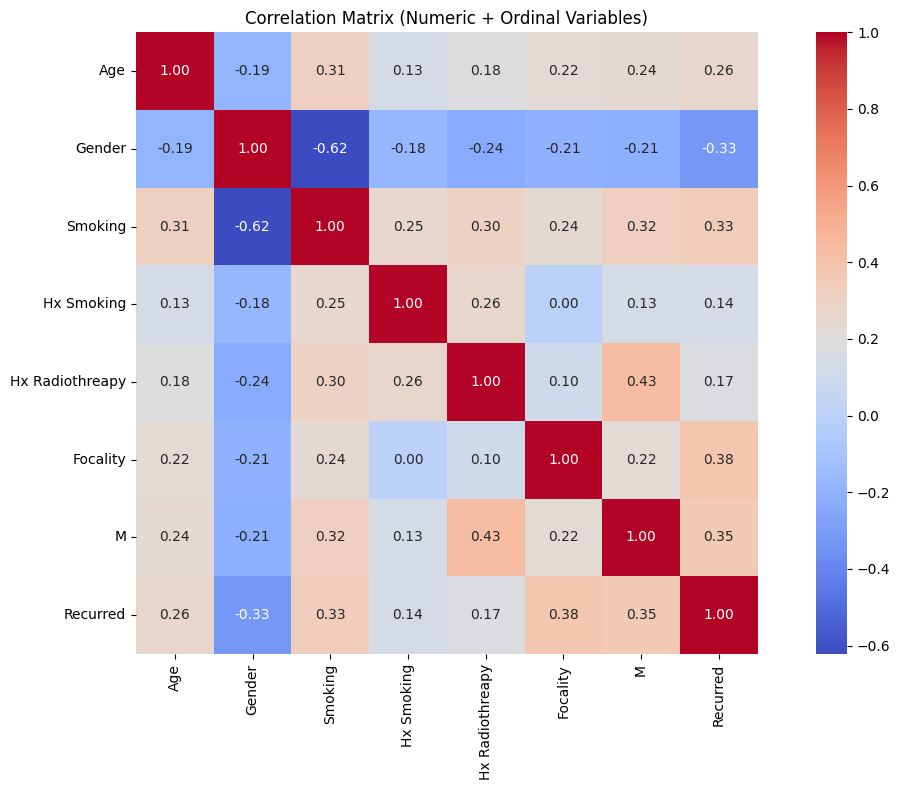

In [11]:
#Correration betwen numerical varianbles 

df_corr = df.copy()
df_corr = df_corr.select_dtypes(include=['int64', 'float64'])

df_corr.head()

corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numeric + Ordinal Variables)')
plt.tight_layout()
plt.show()


Age and all binary variables showed low correlation to the outcome. 
Is time for us to study and transform the categorical variables and measure the relationship of all the variables. The Cramer's phi test is used. 

In [12]:
# Relatiopnship Cramer's compared the outcome 
from scipy.stats.contingency import association

#categorical_cols = df.select_dtypes(include='category').columns

all_cols = df.columns
results = {}

#for col in categorical_cols:
for col in all_cols:
    # Confution matrix
    contingency_table = pd.crosstab(df[col], df['Recurred'])
    
    # Association (Cramér’s V)
    cramers_v = association(contingency_table, method="cramer")
    results[col] = cramers_v

# Important Variables
cramers_df = (
    pd.DataFrame.from_dict(results, orient='index', columns=['Cramers_V'])
      .sort_values(by='Cramers_V', ascending=False)
)

print(cramers_df)


                      Cramers_V
Recurred               1.000000
Response               0.898900
Risk                   0.738402
Adenopathy             0.640342
N                      0.632428
T                      0.607375
Stage                  0.504854
Age                    0.492183
Focality               0.383776
M                      0.354360
Smoking                0.333243
Gender                 0.328189
Pathology              0.246492
Physical Examination   0.184053
Hx Radiothreapy        0.174407
Hx Smoking             0.136073
Thyroid Function       0.115944


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

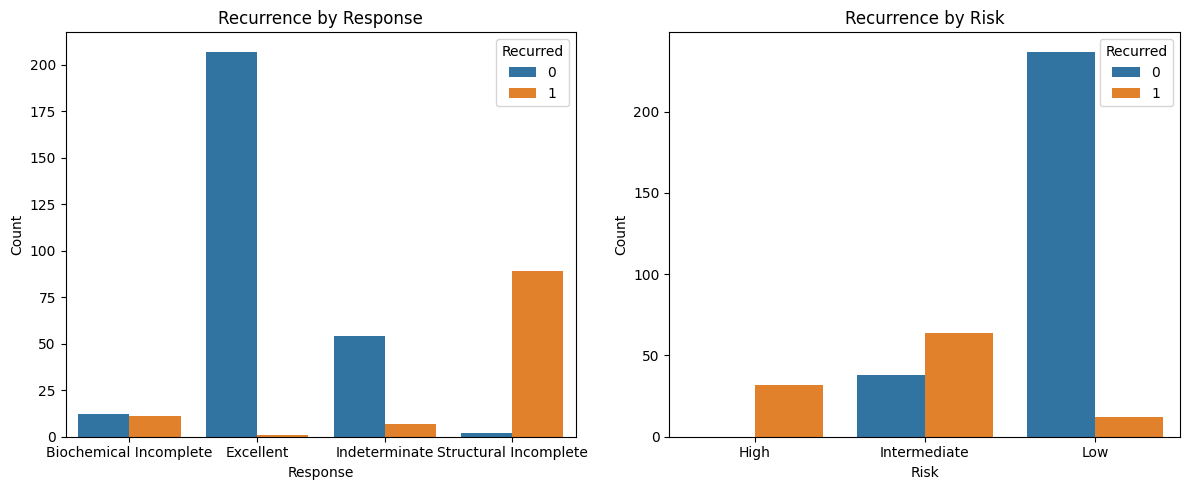

In [13]:
#Print plots for top 2 variables

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Response vs. Recurred
sns.countplot(
    x='Response',
    hue='Recurred',
    data=df,
    ax=axes[0]
)
axes[0].set_title('Recurrence by Response')
axes[0].set_xlabel('Response')
axes[0].set_ylabel('Count')

# Risk vs. Recurred
sns.countplot(
    x='Risk',
    hue='Recurred',
    data=df,
    ax=axes[1]
)
axes[1].set_title('Recurrence by Risk')
axes[1].set_xlabel('Risk')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


We know have some important conclusions.


1. The variable most strongly associated with recurrence appears to be Response.
2. The variables Pathology, Physical Examination, History of Radiotherapy, History of Smoking, and Thyroid Function show weak associations with the outcome.

As this is a classification problem, the performance of Logistic Regression will be compared with that of a Decision Tree in classifying patients.

## Data Preparation

1. Eliminate variables with Cramer's V less than 0. 3
2. Categorical variables identified as important will be transformed into numerical format as ordinal categories. This transformation is necessary to prepare the data for model training.
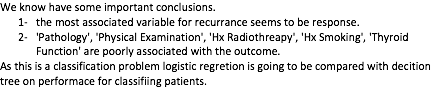
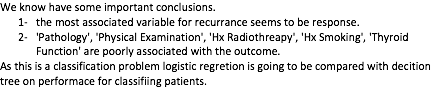
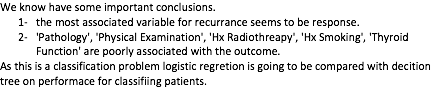
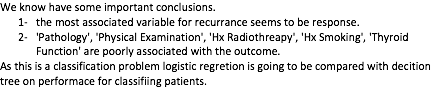

In [14]:
#drop variables with Cramér’s less than 0.3
cols_to_drop = ['Pathology', 'Physical Examination', 'Hx Radiothreapy', 'Hx Smoking', 'Thyroid Function']
cols_existing = [col for col in cols_to_drop if col in df.columns]

if cols_existing:
    df.drop(columns=cols_existing, inplace=True)

In [15]:
df.head()

,Age,Gender,Smoking,Adenopathy,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,No,0,Low,T1a,N0,0,I,Indeterminate,0
1,34,1,0,No,0,Low,T1a,N0,0,I,Excellent,0
2,30,1,0,No,0,Low,T1a,N0,0,I,Excellent,0
3,62,1,0,No,0,Low,T1a,N0,0,I,Excellent,0
4,62,1,0,No,1,Low,T1a,N0,0,I,Excellent,0


In [16]:
# map categories to Numbers for future Modeling and searching collineality
#NO RERUN

df['T'] = df['T'].map({'T1a':1, 'T1b':1.5 , 'T2':2, 'T3a':3, 'T3b':3.5, 'T4a':4, 'T4b':4.5}).astype(int)
df['N'] = df['N'].map({'N0': 0, 'N1a':1, 'N1b':2}).astype(int)
df['Response'] = df['Response'].map({'Excellent':0, 'Indeterminate':1, 'Biochemical Incomplete':2, 'Structural Incomplete':3}).astype(int)
df['Risk'] = df['Risk'].map({'Low':0, 'Intermediate':1, 'High':2}).astype(int)
df['Stage'] = df['Stage'].map({'I':1, 'II':2, 'IVB':4.5, 'III':3, 'IVA':4}).astype(int)
df['Adenopathy'] = df['Adenopathy'].map({'No':0, 'Right':1, 'Extensive':3, 'Left':1, 'Bilateral':2, 'Posterior':1}).astype(int)

df.head()


,Age,Gender,Smoking,Adenopathy,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,0,0,0,1,0,0,1,1,0
1,34,1,0,0,0,0,1,0,0,1,0,0
2,30,1,0,0,0,0,1,0,0,1,0,0
3,62,1,0,0,0,0,1,0,0,1,0,0
4,62,1,0,0,1,0,1,0,0,1,0,0


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         383 non-null    int64
 1   Gender      383 non-null    int64
 2   Smoking     383 non-null    int64
 3   Adenopathy  383 non-null    int64
 4   Focality    383 non-null    int64
 5   Risk        383 non-null    int64
 6   T           383 non-null    int64
 7   N           383 non-null    int64
 8   M           383 non-null    int64
 9   Stage       383 non-null    int64
 10  Response    383 non-null    int64
 11  Recurred    383 non-null    int64
dtypes: int64(12)
memory usage: 36.0 KB


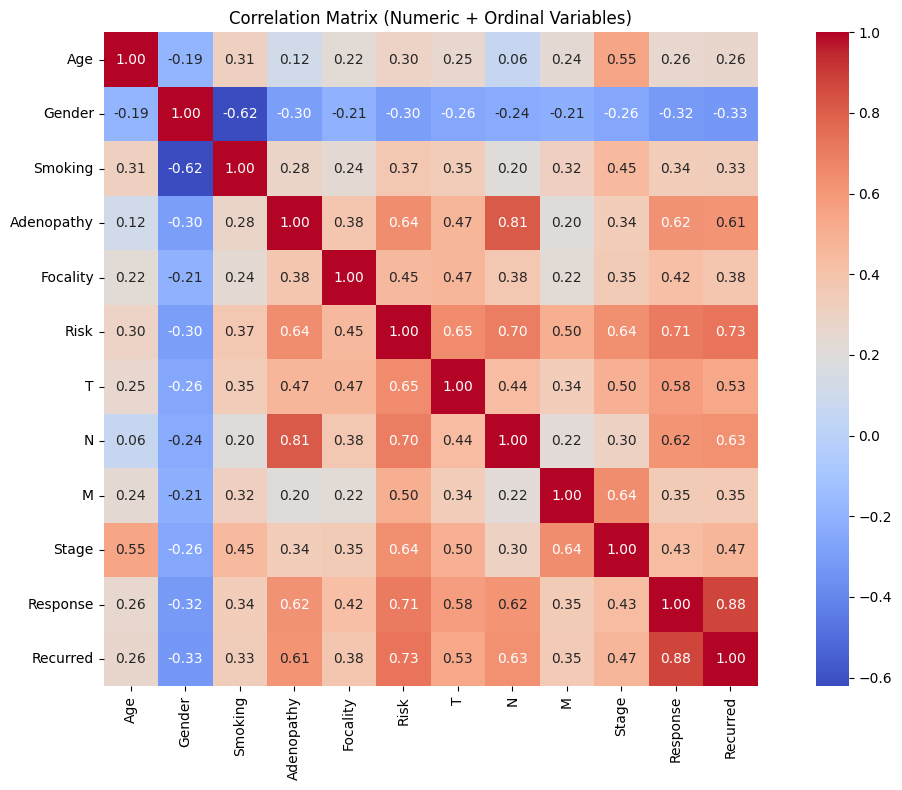

In [18]:
#Corr betwen numerical varianbles 

df_corr = df.copy()
df_corr = df_corr.select_dtypes(include=['int64', 'float64'])

df_corr.head()

corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numeric + Ordinal Variables)')
plt.tight_layout()
plt.show()

## Examine correlation of the variables

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

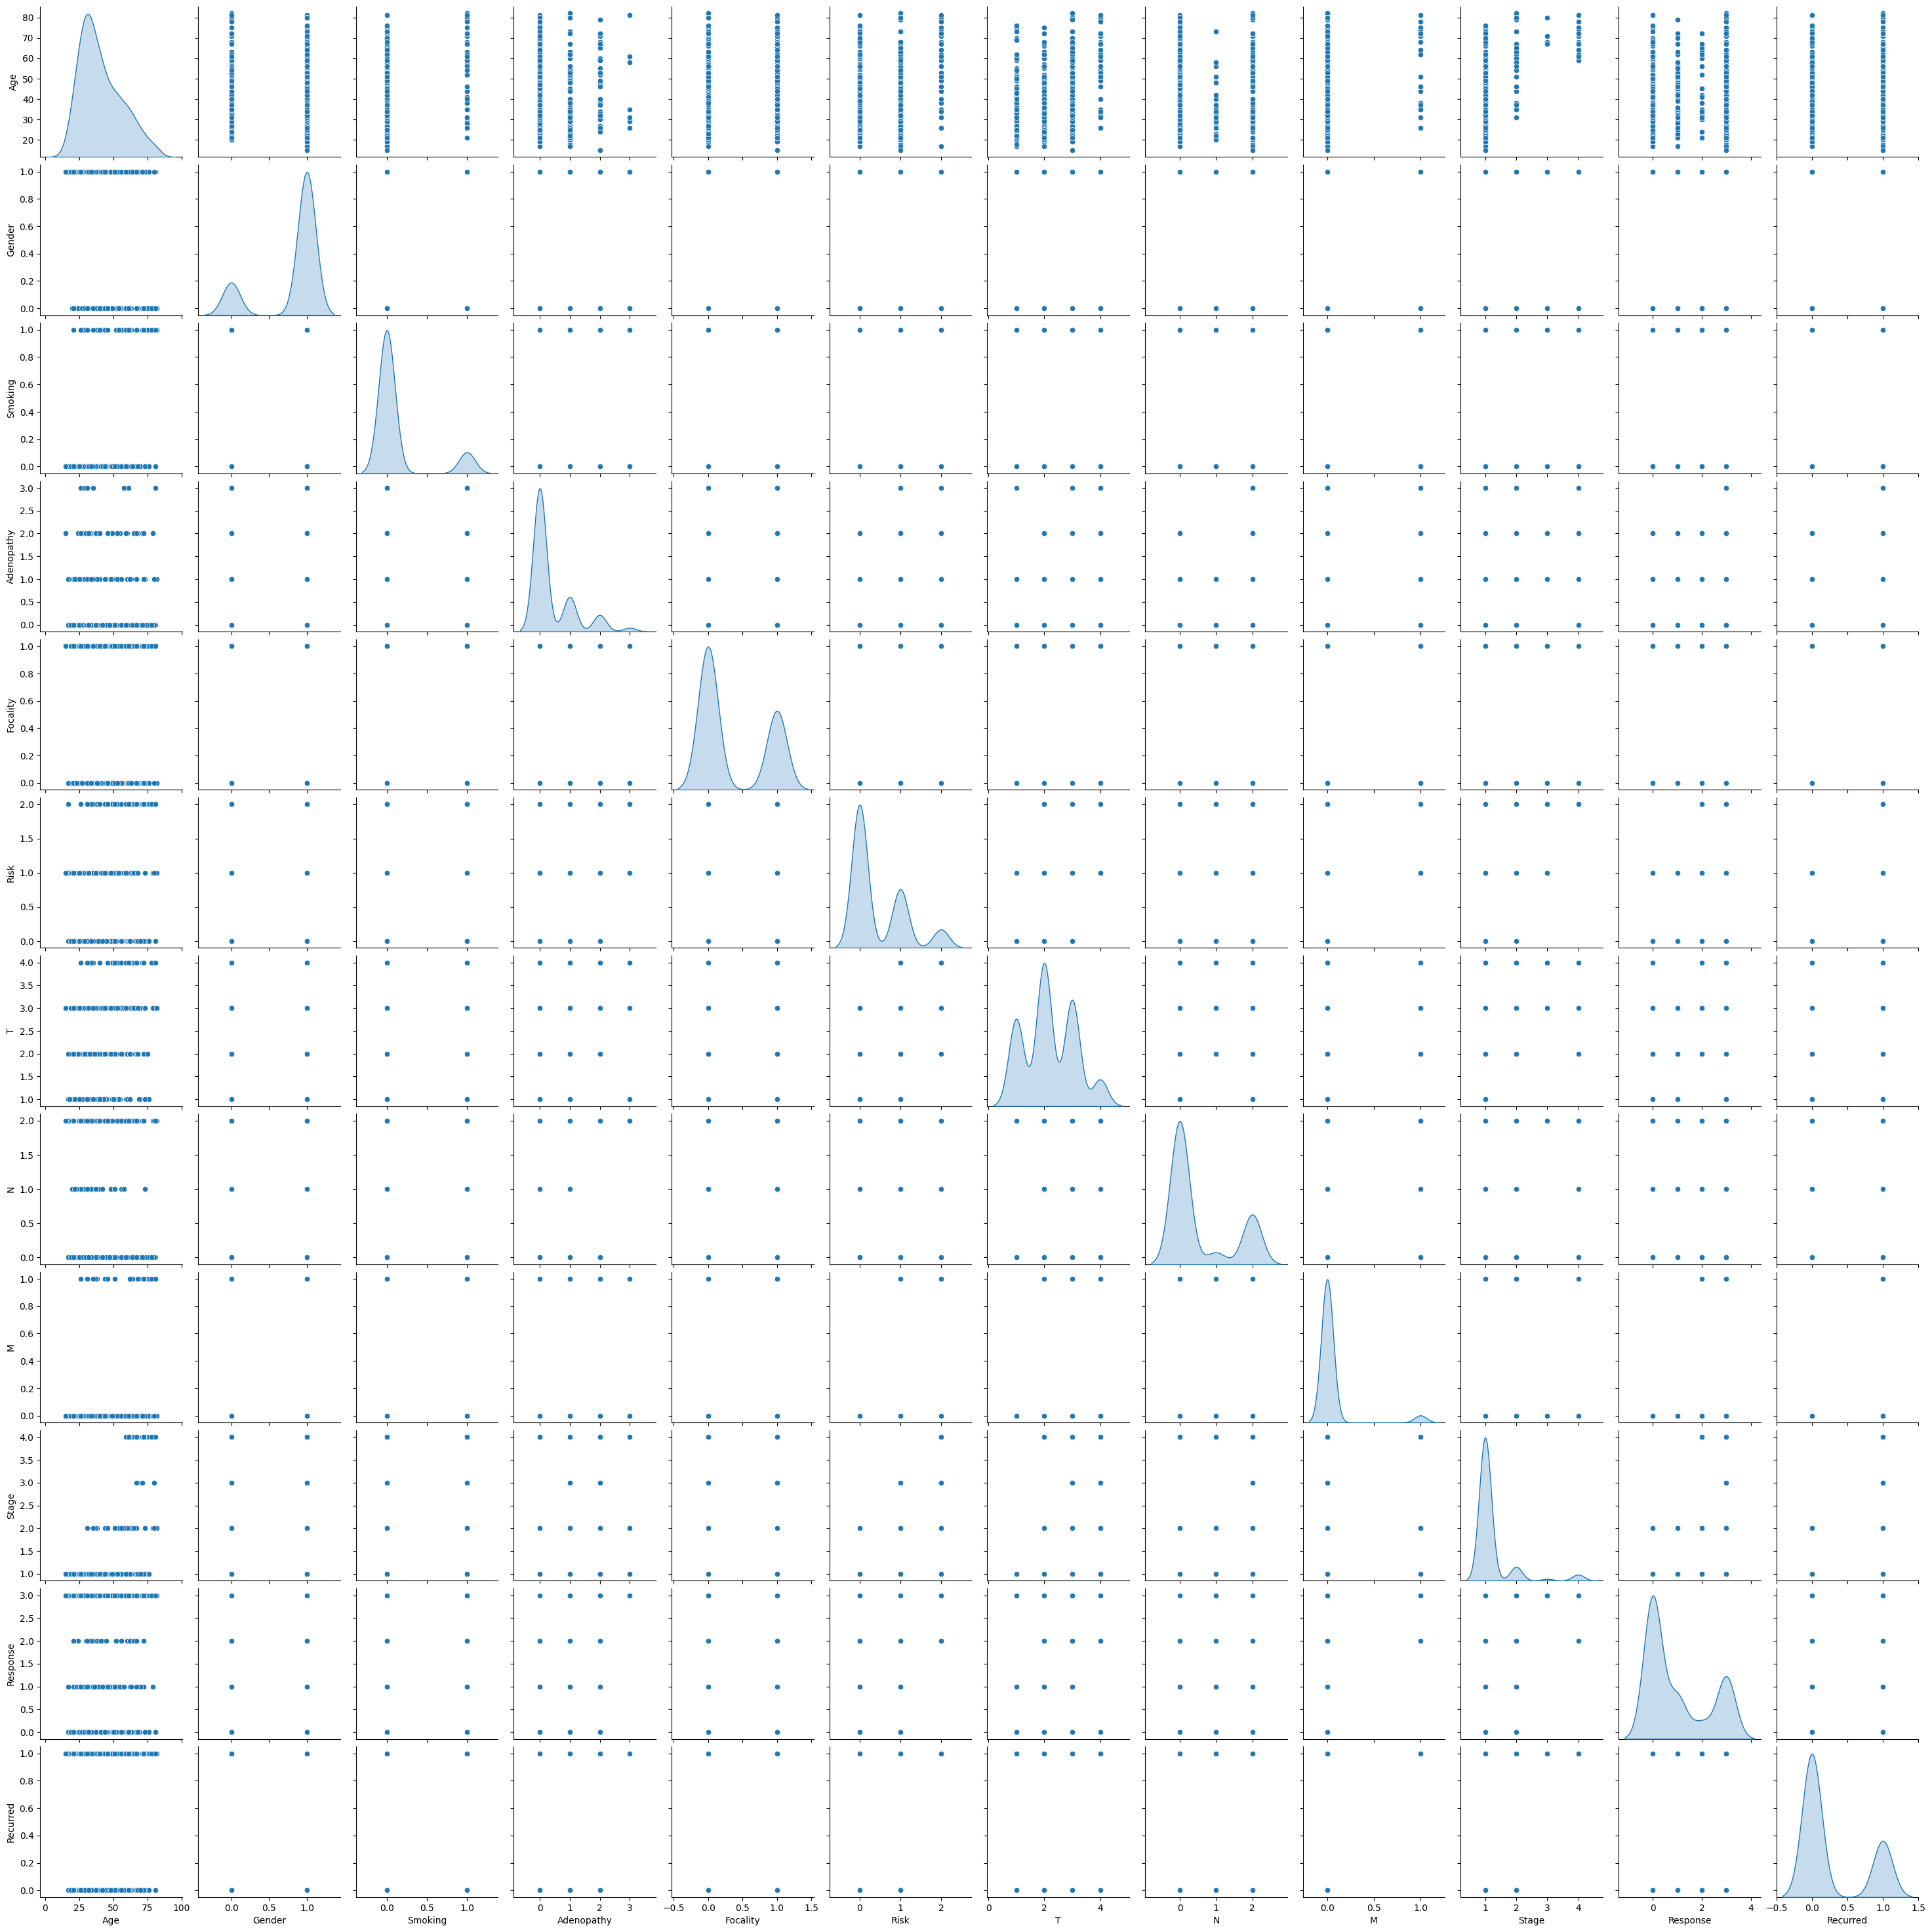

In [19]:
sns.pairplot(df, vars=df.columns, diag_kind='kde')
plt.show()

In [20]:
#vif of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['Recurred'])

# Add intercept term
X = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i)
            for i in range(X.shape[1])]
})
print(vif_data)

# 2. Correlation matrix (absolute values)
corr = X.corr().abs()

high_corr_pairs = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if corr.iloc[i, j] > 0.7:
            high_corr_pairs.append((cols[i], cols[j], corr.iloc[i, j]))

print("\nHighly correlated pairs (|r| > 0.7):")
for var1, var2, r in high_corr_pairs:
    print(f"  {var1} ↔ {var2}: {r:.2f}")

      Variable        VIF
0        const  26.207344
1          Age   1.555860
2       Gender   1.698911
3      Smoking   1.939030
4   Adenopathy   3.313707
5     Focality   1.399269
6         Risk   4.246350
7            T   2.008478
8            N   3.847932
9            M   1.857477
10       Stage   3.163621
11    Response   2.403187

Highly correlated pairs (|r| > 0.7):
  Adenopathy ↔ N: 0.81
  Risk ↔ Response: 0.71


There is a correlation between Adenopathy and the N variable. This is somewhat predictable, as N is the clinical classification of lymph nodes, and Adenopathy is a clinical description. Let's drop the least associated column.
Risk and Response, although they show some correlation, are clinically important variables, so we will keep them both.

In [21]:
df.drop(columns='N', inplace=True)

# Supervised Learning Models
## Logistic Regression

In this section, data is splitted and the scikit-learn library is used to create the Logistic Regression model.

In [22]:
# df.head()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve)

X = df.drop(columns=['Recurred'])
y = df['Recurred']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=5)

# Standardize numeric columns
numeric_cols = X.columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

# Fit 
model = LogisticRegression(solver='liblinear', random_state=5)
model.fit(X_train, y_train)

# Make predictions and probabilities
y_pred   = model.predict(X_test)
y_proba  = model.predict_proba(X_test)[:, 1]

# 
#Evaluation metrics
#

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"Test ROC AUC: {auc:.3f}\n")

# Inspect coefficients (feature importance)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=lambda s: s.abs(), ascending=False)

print("Logistic Regression Coefficients:\n", coef_df)



Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.97      0.88      0.92        32

    accuracy                           0.95        96
   macro avg       0.95      0.93      0.94        96
weighted avg       0.95      0.95      0.95        96

Test ROC AUC: 0.980

Logistic Regression Coefficients:
       Feature  Coefficient
9    Response     2.733213
5        Risk     0.845475
8       Stage     0.625951
7           M     0.539967
0         Age     0.290981
3  Adenopathy     0.256654
1      Gender    -0.175027
6           T    -0.155100
2     Smoking     0.141878
4    Focality     0.008924


Response has a strong coefficient. Model is trained again using only this variable, and without this variable.

In [24]:
# X as 'Response'
X_resp = df[['Response']]
y = df['Recurred']

# Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split (X_resp, y, test_size=0.25, random_state=5)

# Re-train
model_resp = LogisticRegression(solver='liblinear', random_state=5)
model_resp.fit(Xr_train, yr_train)

# Test
yr_pred  = model_resp.predict(Xr_test)
yr_proba = model_resp.predict_proba(Xr_test)[:, 1]

print(classification_report(yr_test, yr_pred))
print("ROC AUC (Response only):", roc_auc_score(yr_test, yr_proba))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.85      0.88      0.86        32

    accuracy                           0.91        96
   macro avg       0.89      0.90      0.90        96
weighted avg       0.91      0.91      0.91        96

ROC AUC (Response only): 0.954833984375


In [25]:
# X without 'Response'
X_resp = df.drop(columns=['Recurred', 'Response'])
y = df['Recurred']

# Split
Xr_train, Xr_test, yr_train, yr_test = train_test_split (X_resp, y, test_size=0.25, random_state=5)

# Re-train
model_resp = LogisticRegression(solver='liblinear', random_state=5)
model_resp.fit(Xr_train, yr_train)

# Test
yr_pred  = model_resp.predict(Xr_test)
yr_proba = model_resp.predict_proba(Xr_test)[:, 1]

print(classification_report(yr_test, yr_pred))
print("ROC AUC (Response only):", roc_auc_score(yr_test, yr_proba))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92        64
           1       0.92      0.72      0.81        32

    accuracy                           0.89        96
   macro avg       0.90      0.84      0.86        96
weighted avg       0.89      0.89      0.88        96

ROC AUC (Response only): 0.94189453125


## Decition Tree

Accuracy: 0.9479166666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.97      0.88      0.92        32

    accuracy                           0.95        96
   macro avg       0.95      0.93      0.94        96
weighted avg       0.95      0.95      0.95        96



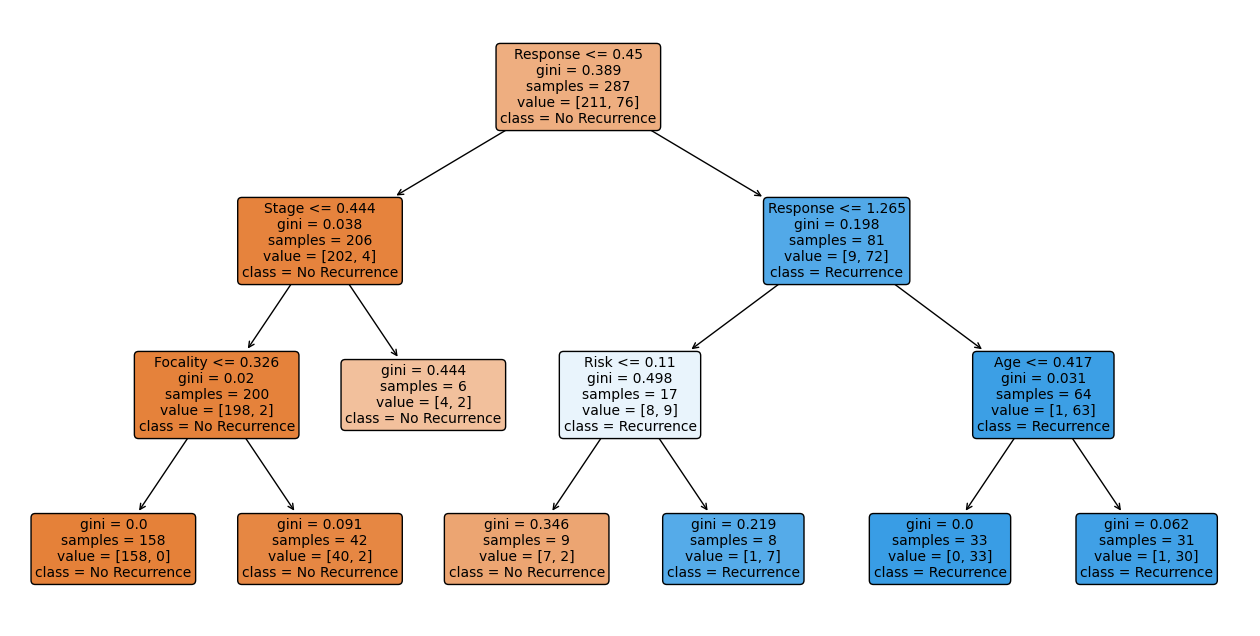

Feature Importances:
 Response      0.949113
Risk          0.036653
Stage         0.012368
Focality      0.001528
Age           0.000338
Gender        0.000000
Smoking       0.000000
Adenopathy    0.000000
T             0.000000
M             0.000000
dtype: float64


In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# tree
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,        
    min_samples_split=10,  
    random_state=5
)

# Fit
dt.fit(X_train, y_train)

#Predict on test set
y_pred_dt = dt.predict(X_test)

#Test
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Visualize the tree 
plt.figure(figsize=(16, 8))
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names=['No Recurrence','Recurrence'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# Feature importances
importances = pd.Series(dt.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print("Feature Importances:\n", importances.head(10))


# Results sumary

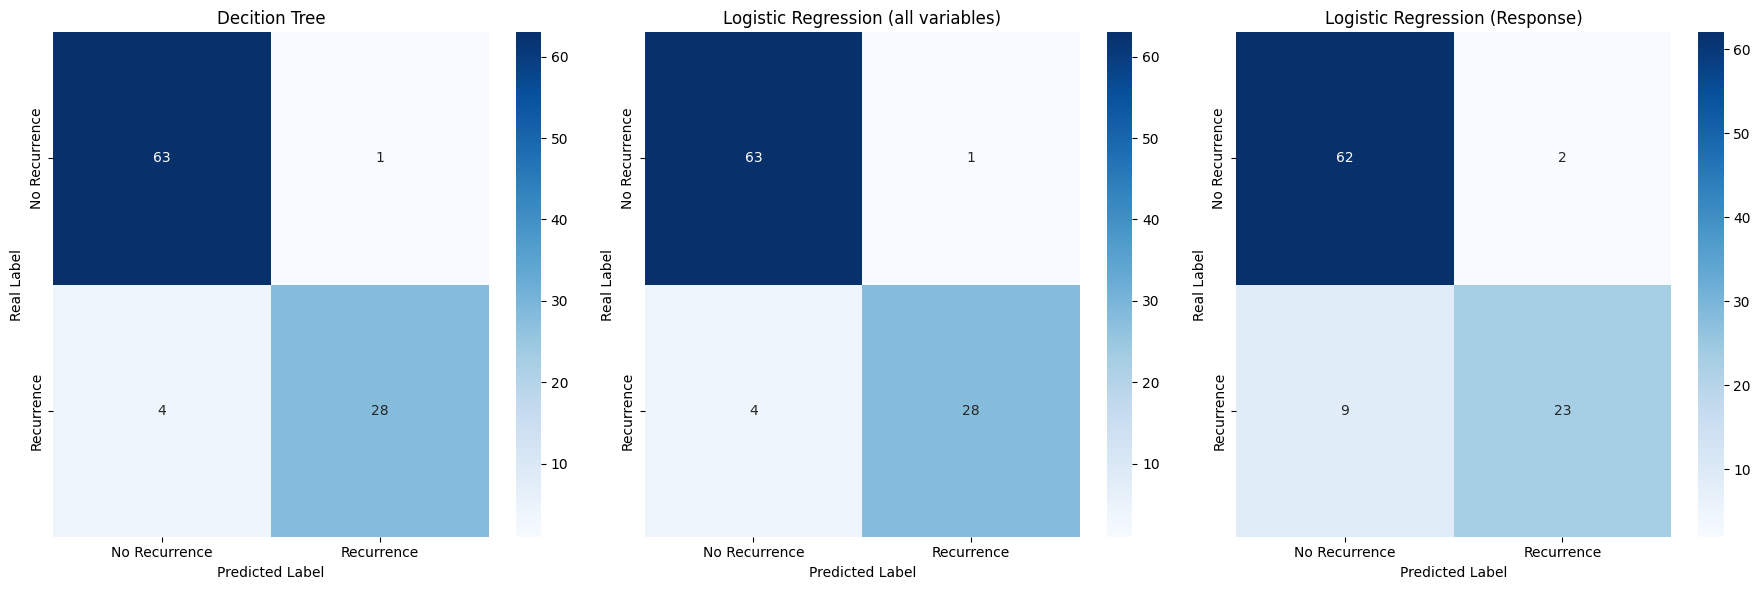

In [27]:
# Lista de matrices y títulos
cm_dt   = confusion_matrix(y_test, y_pred_dt)
cm_full = confusion_matrix(y_test, y_pred)
cm_resp = confusion_matrix(yr_test, yr_pred)

matrices = [
    (cm_dt,   "Decition Tree"),
    (cm_full, "Logistic Regression (all variables)"),
    (cm_resp, "Logistic Regression (Response)")
]

# Crear la figura
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (cm, title) in zip(axes, matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Recurrence','Recurrence'],
                yticklabels=['No Recurrence','Recurrence'],
                ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Real Label')

plt.tight_layout()
plt.show()


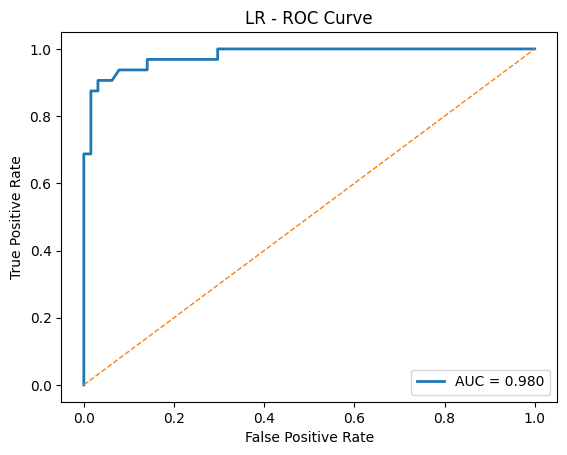

In [28]:
# ROC curve LogReg all
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'AUC = {auc:.3f}')
plt.plot([0,1], [0,1], '--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR - ROC Curve')
plt.legend(loc='lower right')
plt.show()

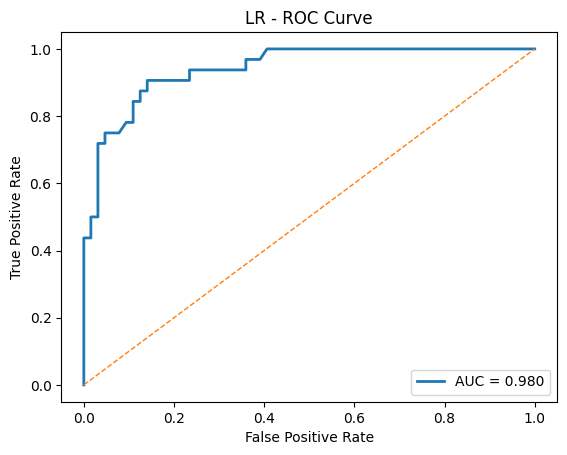

In [29]:
# ROC curve LogReg all
fpr, tpr, _ = roc_curve(yr_test, yr_proba)
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'AUC = {auc:.3f}')
plt.plot([0,1], [0,1], '--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR - ROC Curve')
plt.legend(loc='lower right')
plt.show()

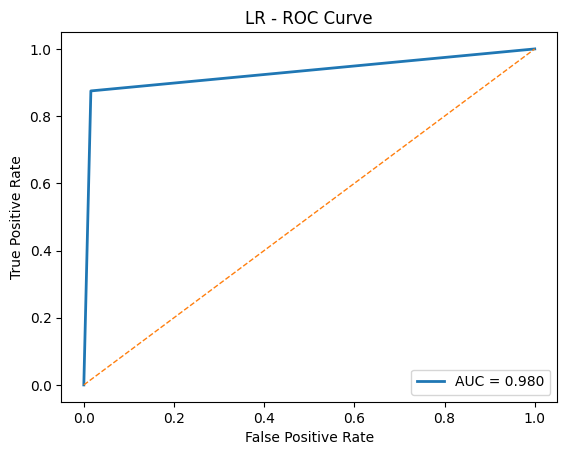

In [30]:
# ROC curve LogReg all
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'AUC = {auc:.3f}')
plt.plot([0,1], [0,1], '--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR - ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Discussion & conclusion

The classifications made with logistic regressions and decision tree were very good. 
Logistic Regression, using all the selected variables, failed in only a few cases. It can be further simplified by focusing on the most important variable, which was Response.
The Decision Tree model had the same performance. While it lacks model optimization, the excellent performance of this simpler model suggests that exploring more complex models may be unnecessary.
As potential problems with this dataset, related to the imbalance of the 0 or 1 class, and those related with most of the patients being classified on Stage 1, are related with the normal distribution of the data in real patients.
